# ECOLE 42 QISKit Hello Quantum World!

Jean-Michel Torres 2019-04-09, IBM Q Hub France

Content under Apache Licence version 2

Star & Download from: https://github.com/jmit34/20190410

### Content:
<ol>
    <li>Quantum Experience: composer overview</li>
    <li>No QISKit: Algo Complexity</li>
    <li>QISKit: single qubit</li>
    <li>QISKit: multi-qbit gates</li>
    <li>Qubits quantum states</li>
    <li>Further reading</li>
</ol>


# 1. Quantum Experience: composer demo

https://www.research.ibm.com/ibm-q/

# 2. No QISKit: Algo Complexity

### Loop, test, and Monte-Carlo

In [ ]:
import time
from random import random
start_time = time.time()

#---> calculation starts here
iterations = 5_000_000                  # change this for accuracy vs duration 
hit = 0                                 # counter of random hits with module < 1 
for i in range(iterations):
    if random()**2 + random()**2 < 1:   # random(a,b) returns a pseudo random float
        hit += 1                        # between a & b. Default : between 0 and 1 
#---> calulation ends here

end_time = time.time()
duration = end_time - start_time

print(f"Total execution time: {duration:.1f} seconds")
print(f"estimation of PI = {4 * hit / iterations}")

## Computing can become huge

Sit 5 people around a table:
<ul><li>5 choices for the first one,</li>
    <li>4 choices for the second,</li>
    <li>3 for the trird... :</li></ul>
5 x 4 x 3 x 2 x 1 = 5! = 120 

Sit 10 people : 10! = 3 628 800 possibilities

Sitting 100 people: 

In [2]:
def factorial(n):
    if n<2:
        return 1
    else:
        return n*factorial(n-1)
 
print(factorial(100))

93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000


is this "big" ? ... see how fast the following function grows : 

\begin{equation}
x \uparrow \uparrow x
\end{equation}

also noted : $\ {x}^{x^{x}} $

In [5]:
'''
See how fast this function grows... 
try this with a = 2, 3, 4, 5... maybe up to 7
8 or more will be very long
'''
a = 5
print(a**a**a)

1911012597945477520356404559703964599198081048990094337139512789246520530242615803012059386519739850265586440155794462235359212788673806972288410146915986602087961896757195701839281660338047611225975533626101001482651123413147768252411493094447176965282756285196737514395357542479093219206641883011787169122552421070050709064674382870851449950256586194461543183511379849133691779928127433840431549236855526783596374102105331546031353725325748636909159778690328266459182983815230286936572873691422648131291743762136325730321645282979486862576245362218017673224940567642819360078720713837072355305446356153946401185348493792719514594505508232749221605848912910945189959948686199543147666938013037176163592594479746164220050885079469804487133205133160739134230540198872570038329801246050197013467397175909027389493923817315786996845899794781068042822436093783946335265422815704302832442385515082316490967285712171708123232790481817268327510112746782317410985888683708522000711733492253913322300756147180

### finding the factors of a large integer

In [16]:
import time
from math import sqrt,floor

start_time = time.time()
# choose one (depending on your ratio patience/CPU)
d =         6721502531819 #(~0.4 sec)  (13)
#d =    40355369611024687 #(~30 sec)   (17)
#d = 70552560783426882343 #(~2100 sec) (20)

maxCalc = floor(sqrt(d))

for i in range(2,maxCalc):
    if d % i == 0:
        print(i)
        break

end_time = time.time()
duration = end_time - start_time
print(f"Total execution time: {duration:.3f} seconds")
print(f"Loops per second {i / duration:.0f}")

1453033
Total execution time: 0.514 seconds
Loops per second 2824609


# Try it ! 

### Deep dive into an example : sorting data. 

<ul><li>a. Let's build a small duration mesurement and plotting tool</li>
    <li>b. Try a naive sort algorithm and try to determine computational complexity.</li> 
    <li>c. Then use the QICKSORT algorithm.</li>
    <li>d. How does pyton sort() compares ?</li>
</ul>


a. Duration plotting tool

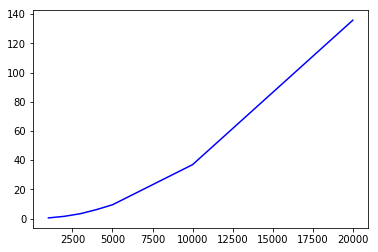

In [7]:
import matplotlib.pyplot as plt

# this will be our array of problem size
x = [1000,2000,3000,4000,5000,10000,20000]

# this will be the run duration
y = [0.4,1.5,3.3,6.1,9.4,36.9,135.8]

plt.plot(x,y,color="blue")

#plt.show

b. Now lets build a naive sorting algo: "bubble sort"

In [26]:
import random

# define a swap function : input : array, index1, index2, 
# returns array with values at index1 and index2 swapped
def swap(arr, i1, i2):
    t = arr[i1]
    arr[i1] = arr[i2]
    arr[i2] = t

# define n : the size of your array
n = 100
# define an array of n random numbers
arr = [random.random() for i in range(n)]

# run n time through the array, and if the next item value is smaller than the 
# current item value : swap those items in the array. (ascending sort)

for i in range(n):
    for j in range(n-1):
        if arr[j+1] < arr[j]:
            swap(arr,j+1,j)


Reuse the bubble sort algo, implementing an exectution timer: 
Use time() function in time library to determine starting time (after the array is loaded) and ending time (after sort is done).

In [29]:
import random
import time

def swap(arr,i1,i2):
    t = arr[i1]
    arr[i1] = arr[i2]
    arr[i2] = t

n= 5000
arr = [random.random() for i in range(n)]
start_time = time.time()

for i in range(n):
    for j in range(n-1):
        if arr[j+1] < arr[j]:
            swap(arr,j+1,j)
end_time = time.time()

duration = end_time - start_time
print(duration)

8.411035776138306


Now build the function that inputs a size and returns the execution time for the bubble-sort. 

In [33]:
import random
import time

def swap(arr,i1,i2):
    t = arr[i1]
    arr[i1] = arr[i2]
    arr[i2] = t

def get_bubble_sort_time(n):
    arr = [random.random() for i in range(n)]
    start_time = time.time()

    for i in range(n):
        for j in range(n-1):
            if arr[j+1] < arr[j]:
                swap(arr,j+1,j)
    end_time = time.time()
    return  end_time - start_time

print(get_bubble_sort_time(3000))

2.0468599796295166


Call this function from a list of sizes, build a list of durations, plot

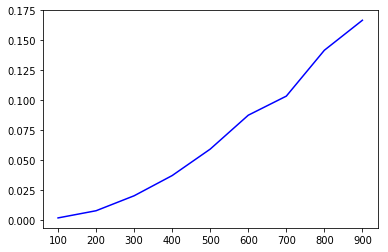

In [45]:
import random
import time
import matplotlib.pyplot as plt

def swap(arr,i1,i2):
    t = arr[i1]
    arr[i1] = arr[i2]
    arr[i2] = t

def get_bubble_sort_time(n):
    arr = [random.random() for i in range(n)]
    start_time = time.time()

    for i in range(n):
        for j in range(n-1):
            if arr[j+1] < arr[j]:
                swap(arr,j+1,j)
    end_time = time.time()
    return  end_time - start_time

times = []
sizes = [100,200,300,400,500,600,700,800,900]
for n in sizes: 
    times.append(get_bubble_sort_time(n))

plt.plot(sizes,times,color="blue")

c. Now to the QUICKSORT (ref. Youtube/"The Coding Train" April 4 2019)

Quicksort was described by Tony Hoare in 1961. It is a recursive algorithm: 
The recursive function applies to one slice of the array to be sorted. 
First call is on the whole array (from index 0 to array length) 
Elle prend un tableau, et 2 positions de l'array et tant queles 2 positions sont différentes, elle s'appelle sur les deux parties du tableau séparées par un "pivot". le pivot est la position telle qu'on a mis à sa gauche les valeurs qui lui sont inférieures et à sa droite celles qui lui sont supérieures. Le pivot est obtenu, en parcourant le tableau (ou une partie du tableau et en répartissant les valeurs à gauche et à droite du pivot selon sa valeur. on peut choisir comme pivot de démarrage (pour chaque partitionnement) comme étant la valeur à la dernière position.

# 3. QISKit: single qubit.

#### imports
you need to import from qiskit : 
<ul>
    <li>QuantumRegister : to define and use qubits</li>
    <li>ClassicalRegister : to get a "classical" measurement of the qubits after computation has happened</li>
    <li>QuantumCircuit to be able to compose your calculation</li>
    <li>execute : this will be used to actually "run" your circuit</li>
</ul>    


In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute

#### define needed registers and build quantum circuit
for example let's define `qr` as a quantum register of size 1 (will use 1 qubit)

`<register_name> = QuantumRegister(size)` 

and let's define `cr` as a classical register with that same size. Siminal notation use ClassicalRegister constructor


In [ ]:
# define registers here, size 1
cr = ClassicalRegister(1)
qr = QuantumRegister(1)

## <span style="color:red"><em>"Bit-flip": NOT (aka X-gate)</em></span>

Very simple single gate circuit

First, let's define a quantum circuit using `qc` and `cr`

`<circuit> = QuantumCircuit(<quantum_register>, <classical_register>)`


In [ ]:
# define quantum  circuit here 
my_circuit = QuantumCircuit(qr,cr)

Then you can add a gate (in this case NOT is noted `x` gate: reverse 0 to 1 and 1 to 0, this way: 

`<circuit>.gate(<qubits>)`

where `<circuit>` is the circuit object you have created above, and `<qubits>`is the list of qubit on which the gate applies `qr[0]` in this case.


In [ ]:
# add identity gate here 
my_circuit.x(qr[0])

Add another gate to your circuit, this one is special : it comes at the end and uses `qr` and `cr`

`<circuit>.measure(<qr,cr>)`    

this will measure the states of the qubits in the quantum register, and load values into the classical register.

In [ ]:
# add measurement gate here 
my_circuit.measure(qr,cr)

You can now visualize the circuit using the .draw() method on your circuit : `<circuit>.draw()`
 

In [ ]:
# use draw method: 
my_circuit.draw()

### prepare for execution

Here we select on which device actual machine or simulator we will run our experiment
Here we select the local simulator.

In [ ]:
from qiskit import Aer
print(Aer.backends())
backend = Aer.get_backend('qasm_simulator')

### execute, and read results

Now we execute our experiment using the `execute` function, returning a "job result" object:

`execute()` uses these parameters: 
<ul>
    <li>circuit object</li>
    <li>the device on which we execute (in our example this is stored in `backend`)</li>
    <li>the number of "shots" we want to run, eg: `shots=1024`</li>
</ul>  

It goes: 

`<myjob> = execute(<my_circuit>,<backend>,shots=nnnn)` 

Then we store the result in a variable `<my_result>` using `.result()` method on the job

Finally, we can print `<my_result>.get_counts(<my_circuit>)`


In [ ]:
# define job, get results
job = execute(my_circuit,backend,shots=1024)
my_result = job.result()
print(my_result.get_counts(my_circuit))  

In [ ]:
# plot results
from qiskit.tools.visualization import plot_histogram
plot_histogram(my_result.get_counts(my_circuit))

# 4. QISKit: multi-qbit gates

## <span style="color:red"><em>4.1 CNOT controlled not </em></span>

flips state of qbit b if qbit a is 1 (else leave b in original state).
<img src="./images/CNOT.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="350 px" align="left">

The cnot gate is : `cx(<ctrl_qubit,target_qubit)`

Don't forget to define quantum and classical registers with size 2. 
The build a quantum circuit. You can use `x` gate on qbit0 to experiment the cnot effect. 

In [ ]:
# define registers, size 2
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

In [ ]:
# define circuit
# add x on qubit0 (or not)
qc_cnot = QuantumCircuit(qr,cr)


qc_cnot.x(qr[0])

# add cnot controlled bit qbit0, target qubit1

qc_cnot.cx(qr[0],qr[1])
# add measure

qc_cnot.measure(qr,cr)

# add draw
qc_cnot.draw()

In [ ]:
# execute, get results 

job = execute(qc_cnot,backend, shots=10)
result = job.result()
result.get_counts(qc_cnot)

In [ ]:
# change the value in get_count method (your circuit name)
plot_histogram(result.get_counts(qc_cnot))

## <span style="color:red"><em>4.2 CONTROL-CONTROL-NOT Toffoli gate</em></span>

if a = 1 and b = 1, then flip c
<img src="./images/Toffoli.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="350 px" align="left">

control-control-not syntax : 

`<circuit>.ccnot(control_qubitA, control_qubitB, taget_qubit)`

In [ ]:
# define registers, size 3
qr = QuantumRegister(3)

cr = ClassicalRegister(3)

In [ ]:
# define quantum circuit

qc_ccnot = QuantumCircuit(qr,cr)

# add x on qubit0 and/or qubit 1 to view different results 

qc_ccnot.x(qr[1])
qc_ccnot.x(qr[0])


# add ccnot, measure, draw 

qc_ccnot.ccx(qr[0],qr[1],qr[2])
qc_ccnot.measure(qr,cr)
qc_ccnot.draw()

In [ ]:
# execute, get results, plot
job = execute(qc_ccnot,backend, shots=1024)
result = job.result()
result.get_counts(qc_ccnot)
plot_histogram(result.get_counts(qc_ccnot))

## <span style="color:red"><em>4.3 CONTROL-SWAP : Fredkin gate</em></span>


if a = 1 then swap b and c states.

Notes: 
 
<ol>
    <li><span style="color:green"><em>Fredkin gate is universal</em></span></li>
    <li><span style="color:green"><em>Quantum gates are reversible.</em></span></li>
</ol>
    

control-swap syntax: 

`<circuit>.cswap(control_qubit, swapped_qubit, swapped_qubit)`

In [ ]:
# define registers, circuit, add X on qubit 0, and/or 1, and/or 2 to view differentt cases: 

qc_cswap = QuantumCircuit(qr,cr)
qc_cswap.x(qr[0])
qc_cswap.x(qr[1])

#add cswap

qc_cswap.cswap(qr[0],qr[1],qr[2])

#add measure and draw

qc_cswap.measure(qr,cr)
qc_cswap.draw()

In [ ]:
# execute, get results, plot...

job = execute(qc_cswap,backend, shots=1024)
result = job.result()
result.get_counts(qc_cswap)
plot_histogram(result.get_counts(qc_cswap))

## <span style="color:red"><em>4.4 What does this do ?</em></span>

This is a basic 2 qubits gate, can you figure out what this does ? 

In [ ]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
mystery = QuantumCircuit(qr,cr)
###########################
mystery.cx(qr[0],qr[1])
mystery.cx(qr[1],qr[0])
mystery.cx(qr[0],qr[1])
mystery.measure(qr,cr)
###########################
mystery.draw()

.... Hint, try this (will run the above circuit against all input combinations 00,01,10,11 and will show you the result): 

In [ ]:
print("       q0 q1")
print("       -- --")
for i in range(4): 
    qc = QuantumCircuit(qr,cr)
    if i%2: 
        qc.x(qr[0])
    if i>1:
        qc.x(qr[1])
    # this is the same circuit as above #
    qc.cx(qr[0],qr[1])
    qc.cx(qr[1],qr[0])
    qc.cx(qr[0],qr[1])
    qc.measure(qr,cr)
    #####################################
    print(f"input:  {(i>1)*1} {i%2}")
    job = execute(qc,backend, shots=1024)
    result = job.result()
    for x in (result.get_counts(qc)):
        print(f"output: {x[0]} {x[1]}")
    print(" ")

# 5. Qubits quantum states

##  <span style="color:red"><em>5.1 Single qbit : "superpositon"</em></span>

Let's do it again : define registers (size 1), quantum circuit, add `h` gate, and `measure` gate, draw circuit. 

In [ ]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
qc_sup = QuantumCircuit(qr,cr)
qc_sup.h(qr[0])
qc_sup.measure(qr,cr)
qc_sup.draw()

execute and get results

In [ ]:
job = execute(qc_sup,backend, shots=8096)
result = job.result()
result.get_counts(qc_sup)
plot_histogram(result.get_counts(qc_sup))

<img src="./images/h_bloch2.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="350 px" align="left">

### See this page for more on what happens on the "Bloch Sphere" when using this and other quantum gates : https://javafxpert.github.io/grok-bloch/

#### More on moving in the Bloch-Sphere ?

In [ ]:
from math import sqrt
from qiskit import QuantumCircuit, QuantumRegister, BasicAer, execute


## Setting up:
#
num_qubits = 1
qr = QuantumRegister(num_qubits, "qr")
circ = QuantumCircuit(qr)


## Building the circuit:
#
circ.x( qr[0] )     # inverting the first and only qubit

## Printing the circuit:
#
print( circ.draw().single_string() )
print(" ")

## Setting up the statevector simulator:
#
simulator = BasicAer.get_backend('statevector_simulator')

## Running the simulator with the circuit on different input states:
#
input_state_zero    = [1, 0]                        # state |0>     or Z+
input_state_one     = [0, 1]                        # state |1>     or Z-
input_state_plus    = [1/sqrt(2),   1/sqrt(2) ]     # state |+>     or X+
input_state_minus   = [1/sqrt(2),  -1/sqrt(2) ]     # state |->     or X-
input_state_eye     = [1/sqrt(2),  1j/sqrt(2) ]     # state |i>     or Y+
input_state_mye     = [1/sqrt(2), -1j/sqrt(2) ]     # state |-i>    or Y-

for input_statevector in (input_state_zero, input_state_one, input_state_plus, input_state_minus, input_state_eye, input_state_mye):

    print( "Input statevector : {}".format(input_statevector) )
    output_statevector = list( execute(circ, simulator, backend_options={"initial_statevector": input_statevector}).result().get_statevector(circ) )
    print( "Output statevector: {}".format(output_statevector) )
    print("")


##  <span style="color:red"><em>5.2 What is superposition exactly ?</em></span>

Now try to build a quantum circuit, using a single qubit, use H then H again, then measure...

In [ ]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
qc_sup = QuantumCircuit(qr,cr)
qc_sup.h(qr[0])
qc_sup.h(qr[0])
qc_sup.measure(qr,cr)
qc_sup.draw()

In [ ]:
job = execute(qc_sup,backend, shots=1024)
result = job.result()
result.get_counts(qc_sup)
plot_histogram(result.get_counts(qc_sup))

### Here is what happened ! (hope this helps :-) )
<br>
Let's define states |0⟩, |1⟩ as unitary basis vectors in a two dimensional space, we can write them in this form: 

\begin{equation}
|0⟩ = 
\left(
\begin{array}{cc}
 1 \\
 0 \\
\end{array}
\right)
\hspace{1cm}
|1⟩ = 
\left(
\begin{array}{cc}
 0 \\
 1 \\
\end{array}
\right)
\hspace{1cm}
\end{equation}

Then we define H (Hadamard operator) with this matrix : 


\begin{equation}
H = \frac{1}{\sqrt{2}}
\left(
\begin{array}{cc}
 1 & 1  \\
 1 & -1  \\
\end{array}
\right)
\hspace{1cm}
\end{equation}


It is easy to verify that : 


\begin{equation}
H|0⟩ = \frac{1}{\sqrt{2}} 
\left(
\begin{array}{cc}
 1 \\
 1 \\
\end{array}
\right)
\end{equation}

also, if we multiply this result again by H, we will find : 
\begin{equation}
HH|0⟩ =
\left(
\begin{array}{cc}
 1 \\
 0 \\
\end{array}
\right)
\end{equation}

That is :

\begin{equation} 
HH|0⟩ = |0⟩
\end{equation}

Which makes sense because it is also easy to verify that : 

\begin{equation} 
H^2 = I
\end{equation}

where:

\begin{equation}
I = 
\left(
\begin{array}{cc}
 1 & 0 \\
 0 & 1 \\
\end{array}
\right)
\end{equation}

##  <span style="color:red"><em>5.3 Multi qbit entanglement</em></span>

Now build a quantum circuit using 2 qubits, start with H on qbit0 and then CNOT (q0 controlling q1): 

`<cicruit>.cx(qr[0],qr[1])`

In [ ]:
#define registers, define curcuit, build circuit, draw.
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc_bell = QuantumCircuit(qr,cr)
qc_bell.h(qr[0])
qc_bell.cx(qr[0],qr[1])
qc_bell.measure(qr,cr)
qc_bell.draw()

In [ ]:
# define, execute job and plot results
job = execute(qc_bell,backend, shots=1024)
result = job.result()
result.get_counts(qc_bell)
plot_histogram(result.get_counts(qc_bell))

### What does this mean ? ... 

This is called a Bell state and can be written as : 

\begin{equation} 
|Bell⟩ = \frac{1}{\sqrt{2}}\left(|00⟩ + |11⟩ \right) 
\end{equation}

Let's assume we can factor it (find two states the product of which is the Bell state), for example: 

\begin{equation} 
|\phi⟩ = a|0⟩ + (b+ic)|1⟩  
\end{equation}
and 
\begin{equation} 
|\psi⟩ = d|0⟩ + (e+if)|1⟩  
\end{equation}

Then: 
\begin{equation} 
|\phi⟩|\psi⟩ = (ad|00⟩ + (ae + iaf)|01⟩ + (db+idc)|10⟩ + (b+ic)(e+if)|11⟩)  
\end{equation}

As |00⟩, |01⟩, |10⟩, |11⟩ are basis vectors, we can identify:  

\begin{equation}
ad = \frac{1}{\sqrt{2}}
\end{equation}
\begin{equation}
ae + iaf = 0
\end{equation}
\begin{equation}
db + idc = 0
\end{equation}
\begin{equation}
be - cf + i(bf+ce) = \frac{1}{\sqrt{2}}
\end{equation}

First a*d is not null so both a and d are not null. Second a complex number is equal to 0, then both is real and imaginary component are equal to 0. With a and d both not null, then e = f = b = c = 0, with that: be - cf = 0, but this does not work with : 
\begin{equation}
be - cf = \frac{1}{\sqrt{2}}
\end{equation}

Proving that the Bell state cannot be written as a product of single qubit states. 


### ... it means we cannot know anything about the separate components of the entangled system, we can only know about the whole.

##  <span style="color:red"><em>5.4 Bell state: running on actual quantum hardware</em></span>


In [ ]:
# sign on to IBM Q Experience, get your API Token, write it in a file (eg Qconfig.py), in a line:  
# APItoken = '<your_API_token'>

import Qconfig

print(Qconfig.APItoken)
#  now I can use Qconfig.APItoken to get the API key value 

In [ ]:
from qiskit import IBMQ
IBMQ.enable_account(Qconfig.APItoken)

In [ ]:
my_back_end = IBMQ.get_backend('ibmq_5_tenerife')
my_back_end = IBMQ.get_backend('ibmq_16_melbourne')

In [ ]:
print(my_back_end.status())

In [ ]:
job = execute(qc_bell,my_back_end, shots=1024)
result = job.result()
result.get_counts(qc_bell)
plot_histogram(result.get_counts(qc_bell))

##  <span style="color:red"><em>5.5 Swap</em></span>
### Swapping 2 qubits states on a real computer

In [ ]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc_swap = QuantumCircuit(qr,cr)
###########################
qc_swap.x(qr[0])
qc_swap.cx(qr[0],qr[1])
qc_swap.cx(qr[1],qr[0])
qc_swap.cx(qr[0],qr[1])
qc_swap.measure(qr,cr)
###########################
qc_swap.draw()

In [ ]:
job = execute(qc_swap,my_back_end, shots=1024)
result = job.result()
result.get_counts(qc_swap)
plot_histogram(result.get_counts(qc_swap))

##  <span style="color:red"><em>5.6 Bernstein-Vazirani : "oracle"</em></span>
### towards quantum computing

In [ ]:
q = QuantumRegister(4)
tmp = QuantumRegister(1)
res = ClassicalRegister(4)

In [ ]:
# secret = 1101
s = 13
oracle = QuantumCircuit(q,tmp,res)

In [ ]:
for i in range(len(q)):
    if ( s & (1 << i) ):
        oracle.cx(q[i],tmp[0])

In [ ]:
bv = QuantumCircuit(q,tmp,res)
bv.x(tmp[0])
bv.h(q)
bv.h(tmp)
bv += oracle
bv.h(q)
bv.h(tmp)
bv.measure(q,res)

In [ ]:
bv.draw()

In [ ]:
my_job = execute([bv], backend, shots=100)

In [ ]:
my_job = execute([bv], my_back_end, shots=8192)

In [46]:
result = my_job.result()
result.get_counts(bv)
print(result.get_counts(bv))
from qiskit.tools.visualization import plot_histogram
plot_histogram (result.get_counts(bv))

NameError: name 'my_job' is not defined

##  <span style="color:red"><em>5.7 More QISKit functions</em></span>

nombre de gates, largeur, nobre de circuits indépendants...



# 6. Further reading

## <a href="https://www.research.ibm.com/ibm-q/">IBM Q informations, resources</a>

<img src="./images/IBMQ.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="800 px" align="left">


### <a href="https://qiskit.org/">QISKit : documentations, tutorials, GitHub</a>

<img src="./images/qiskitOrg.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="800 px" align="left">



## <a href="https://www.youtube.com/channel/UClBNq7mCMf5xm8baE_VMl3A">QISKit channel on Youtube</a>
<img src="./images/qiskitYoutube.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="800 px" align="left">


### <a href="https://fr.wikipedia.org/wiki/Calculateur_quantique">Wikipedia: Calculateur Quantique</a>
<img src="./images/QCWikipedia.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="800 px" align="left">

## Isaac Chuang & Peter Shor, Quantum Information Science I, Part 1
### Edx MOOC
<br>
<img src="./images/MOOCedX.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="800 px" align="center">
<br>

## Leonard Susskind, Art Freidman: Mécanique Quantique, Le minimum Théorique
### Presses polytechniques et universitaires romandes
<br>
<img src="./images/susskindFriedman.jpg" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="400 px" align="center">
<br>

## David McMahon, Quantum Computing Explained 
### Wiley
<br>
<img src="./images/mcmahon.jpg" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="400 px" align="center">
<br>

### David Mermin, Calculs et Algorithmes Quantiques, 
#### EDP Sciences, CNRS Editions
<br>
<img src="./images/mermin.jpg" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="400 px" align="center">
<br>

## Charles Corge, L'informatique Quantique, qu'est-ce et pour quoi faire ? 
### Ellipses
<br>
<img src="./images/corge.jpeg" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="400 px" align="center">
<br>

## Michael A. Nielsen and Isaac L. Chuang : Quantum Computation and Quantum Information
### Cambridge
<br>
<img src="./images/nielsenChuang.jpg" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="400 px" align="center">
<br>